### Библиотеки для построения графиков и интерактивного интерфейса

#### Matplotlib

Самая популярная и базовая библиотека для построения графиков - это matplotlib. Это огромная библиотека, и изучать ее возможности можно неделями, но на самом деле главное - разобраться в основных ее понятиях, остальное - уже финтифлюшки. Matplotlib необходимо отдельно устанавливать:

    pip install matplotlib
        или
    conda install matplotlib
    
(в анаконде он уже может быть установлен, в колабе точно установлен). 

**Архитектура Matplotlib**

Matplotlib имеет три основных слоя: слой нижнего уровня (backend), слой рисунков и слой скриптов. Слой нижнего уровня содержит три интерфейсных класса: канва рисунка (figure canvas), определяющая область рисунка, прорисовщик (renderer), умеющий рисовать на этой канве, и событие (event), обрабатывающее ввод пользователя вроде щелчков мыши. Слой рисунков знает, как рисовать с помощью Renderer'а и рисовать на канве. Все, что находится на рисунке Matplotlib, является экземпляром слоя рисунка (artist). Засечки, заголовок, метки – все это индивидуальные объекты слоя рисунков. Слой скриптов – это облегченный интерфейс, который очень полезен для ежедневного применения.

Два объекта, о которых необходимо знать для работы с графиками - это Figure & Axes. 

**Figure** - это контейнер самого верхнего уровня, та область, на которой все нарисовано. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров Axes.
**Axes** - это та область на которой чаще всего и отражаются графики (данные в виде графиков), а также все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.). 
Каждая область Axes содержит XAxis и YAxis. Они содержат, деления, метки и прочие вспомогательные атрибуты.

Когда собираемся нарисовать график, сперва заводим экземпляр класса Figure, а потом к нему специальным методом добавляем область для будущего графика. 

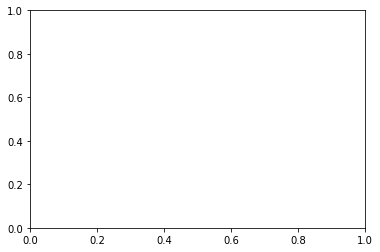

In [1]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

plt.show()

Можно убедиться, что эти фигуры разные, если поменять их цвет:

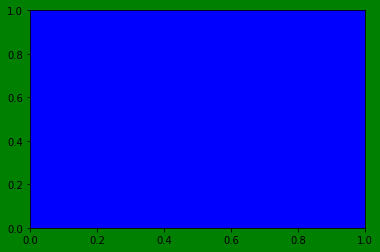

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set(facecolor='green')
ax.set(facecolor='blue')
plt.show()

Вообще метод set() есть и у фигуры, и у области графика, и там можно устанавливать очень много всего разного. Причем обычно есть варианты вида set(Title=''...) vs set_title(). 

Наиболее простой способ по-быстрому установить визуальные настройки графика - специальная форматированная строка у метода plot(); подробное описание того, что в ней можно указать, есть в [документации библиотеки](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). 

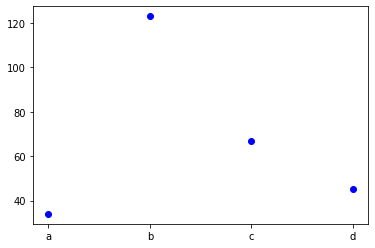

In [4]:
X = ['a', 'b', 'c', 'd']
Y = [34, 123, 67, 45]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Y, 'bo')
plt.show()

Таким образом, как же строить сами графики на области графика? Один самый простой метод уже написан вверху: это plot(). На самом деле, можно использовать этот метод и не создавая отдельный экземпляр, но тогда большинство тонких настроек не будет доступно:

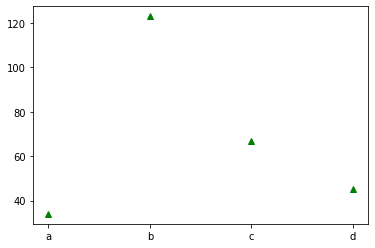

In [5]:
plt.plot(X, Y, '^g')
plt.show()

Какие еще есть методы в matplotlib?

- ax.scatter(X, Y)
- ax.bar(x, height(y), width, bottom, align)
- ax.hist(x, bins)
- ax.pie(sizes, labels=labels, autopct='%1.1f%%')

Можете сами посмотреть, как они устроены и как выглядят. 

Какие базовые настройки стоит знать, когда строим графики?

- У Figure есть size: fig = plt.figure(figsize=(x, y))
- У ax можно установить заголовок: ax.set_title('Title')
- У графиков можно менять цвет, форму, линии, размер шрифтов;
- Можно устанавливать xticks (значения по оси х) и yticks;
- Можно сохранять график с помощью savefig();
- Можно сразу устанавливать весь стиль для графика с помощью plt.style.use(['...']) (посмотреть, какие доступны, можно с помощью plt.style.available)

**Подграфики**

Matplotlib позволяет строить много axes внутри одной figure: для этого есть два разных способа. Более гибкий - это использовать метод add_subplot():

In [ ]:
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

Первая цифра из трех - это номер ряда, вторая - номер строки, а третья - индекс подграфика (matplotlib воспринимает область графика как табличку). 

Каждый подграфик можно настраивать как угодно; графики не обязаны занимать всю область figure, можно их рисовать как хочется. 

Более простой (и менее гибкий) способ - это использовать метод subplots():

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols =2 )

axes[0,0].set(title='axes[0,0]')
axes[0,1].set(title='axes[0,1]')
axes[1,0].set(title='axes[1,0]')
axes[1,1].set(title='axes[1,1]')

for ax in axes.flat:
    ax.set(...)

plt.show()

На самом деле этот же метод удобнее использовать и для одиночного графика:

    fig, ax = plt.subplots()

**Трехмерные графики**

В matplotlib есть подбиблиотека, которая позволяет рисовать графики в трехмерном пространстве. Подробно рассматривать не будем, но самый простой пример кода выглядит так:

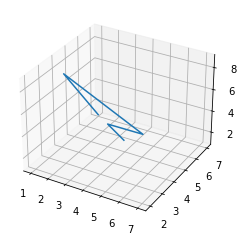

In [11]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X, Y, Z = [1, 2, 7, 3, 6], [7, 3, 2, 5, 2], [1, 9, 7, 3, 6]
ax.plot(X, Y, Z)
plt.show()

#### Seaborn

Seaborn - это библиотека, которая построена на базе matplotlib и очень хорошо с ней взаимодействует. Главная цель Seaborn - это визуализация данных для машинного обучения, поэтому seaborn умеет работать с датафреймами pandas (скоро посмотрим); также у seaborn ужасно красивые палитры. :) Сейчас посмотрим только их, но экстенсивно будем пользоваться этой библиотекой на курсе по машинному обучению. 

Seaborn тоже, конечно, нужно устанавливать. 

        pip install seaborn
        
Импортируется он обычно как sns. 

У него есть возможность автоматически настраивать масштаб графика в зависимости от целей, с которыми вы его создаете:

    sns.set_context('paper', 'notebook', 'talk', 'poster')
    
(Poster сделает крупный график, например). По умолчанию используется notebook.

Самое клевое - это палитры, которые в самом seaborn очень разнообразны, плюс можно собирать их самостоятельно из номеров цветов. Как посмотреть, какие цвета есть в seaborn вообще?

In [13]:
import seaborn as sns

palette = sns.color_palette("br")  # напечатать какую-нибудь ерунду вместо названия палитры, и в ошибке сиборн послушно вывалит все свои палитры

ValueError: br is not a valid palette name

Дальше уже можно эти цвета выбирать и смотреть:

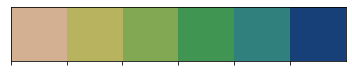

In [14]:
palette = sns.color_palette('gist_earth_r')
sns.palplot(palette)

Что умеет строить seaborn:

- sns.barplot(x=x, y=y, palette=..., ci=None)  # ci - чтобы убрать черную полосу, это стандартное отклонение
- sns.pointplot(x=x,y=y, color='lime', alpha=0.8)
- sns.jointplot(x=x, y=y, kind="kde", height=7)

Поскольку тема построения графиков неисчерпаема, я всячески вас побуждаю самостоятельно копаться в документации и на стэковерфлоу, чтобы рисовать все более красивые графики. :) Они здорово помогут вам при защите диплома...

**Plotly**

Plotly — библиотека для визуализации данных, состоящая из нескольких частей:

- Front-End на JS
- Back-End на Python (за основу взята библиотека Seaborn)
- Back-End на R

В отличие от matplotlib и seaborn, plotly позволяет строить интерактивные визуализации. Его, конечно, нужно установить:

    pip install plotly
    
Импортируем саму библиотеку и парочку других, которые нам пригодятся.

In [1]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

Попробуем отрисовать обычную параболу.

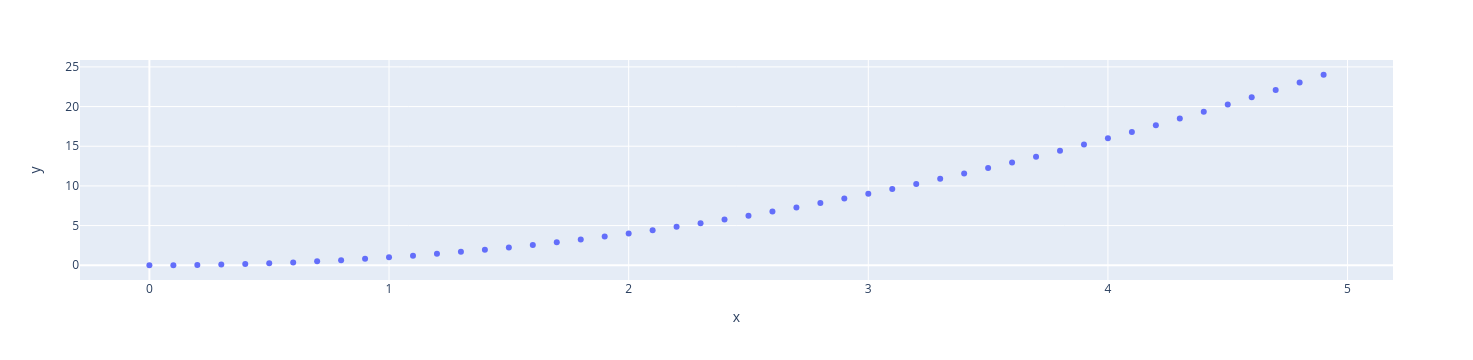

In [2]:
def f(x):
    return x ** 2

x = np.arange(0, 5, 0.1)

fig = px.scatter(x=x, y=f(x))
fig.show()

Обратите внимание - при наведении курсора на точки графика будут всплывать подсказки. Это называется экспресс - быстрый способ что-то визуализировать ( у matplotlib тоже такой есть). 

Настроек, правда, пока маловато. На самом деле plotly точно так же позволяет сперва создавать область графика, а потом добавлять туда какие-то фигуры. В отличие от matplotlib отдельные объекты осей не создаются, хотя мы с ними ещё столкнёмся, когда захотим построить несколько графиков вместе.

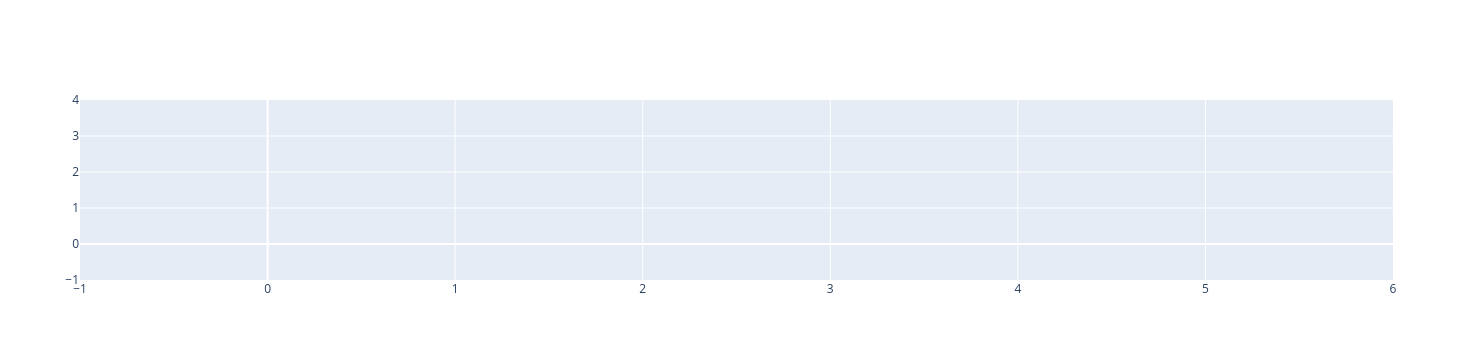

In [3]:
fig = go.Figure()
#Здесь могут быть самые разные штуки
fig.show()

Чтобы добавить что-то на область, нам понадобится метод фигуры add_trace. Что хотим добавить? Наверное, какой-то график. График мы уже рисовали с помощью Scatter в экспрессе, у Объектов есть свой Scatter, давайте глянем, что он делает:

In [4]:
go.Scatter(x=x, y=f(x))

Scatter({
    'x': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
                1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
                2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
                4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
    'y': array([0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02, 1.600e-01, 2.500e-01,
                3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01, 1.000e+00, 1.210e+00,
                1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00, 2.560e+00, 2.890e+00,
                3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00, 4.840e+00, 5.290e+00,
                5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00, 7.840e+00, 8.410e+00,
                9.000e+00, 9.610e+00, 1.024e+01, 1.089e+01, 1.156e+01, 1.225e+01,
                1.296e+01, 1.369e+01, 1.444e+01, 1.521e+01, 1.600e+01, 1.681e+01,
                1.764e+01, 1.849e+01, 1.936e+01, 2.025e+01, 2.116e+01, 2.209e+01,
                2.

А теперь объединим:

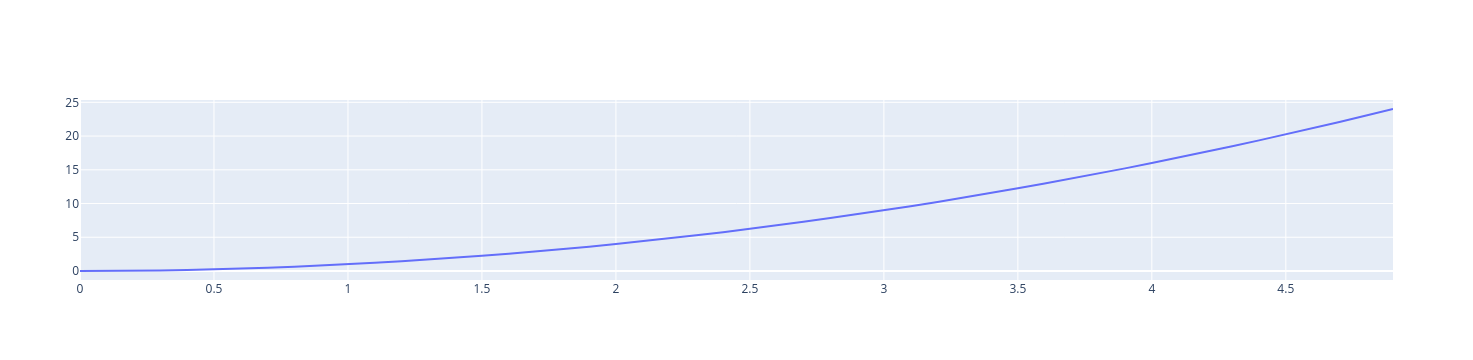

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.show()

Как видим, отличия не только в коде, но и в результате — получилась гладкая кривая.

Кроме того, такой способ позволит нам нанести на график столько кривых, сколько мы хотим:

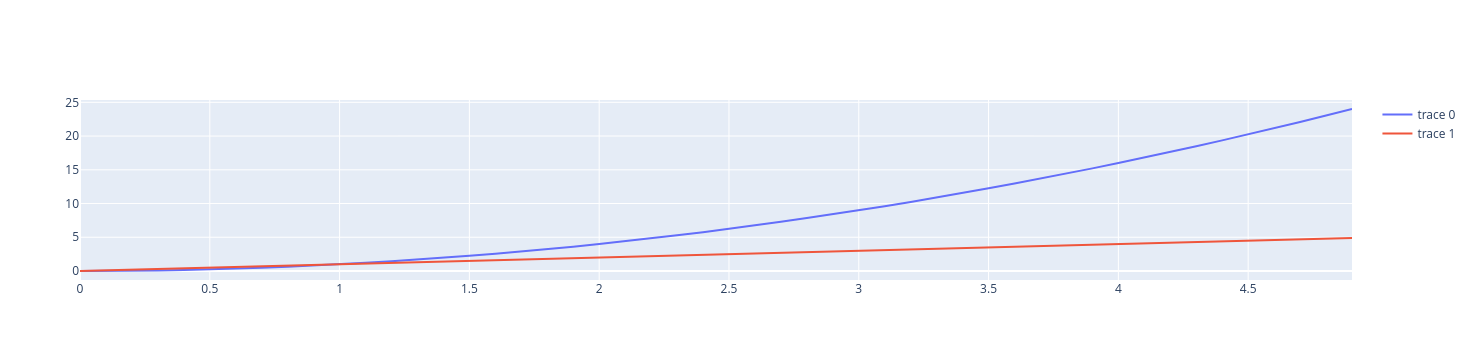

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=x))
fig.show()

Погодите, что это такое? Справа появилась ещё и легенда!

Впрочем, логично, пока график был один, зачем нам легенда?

Но магия Plotly тут не заканчивается. Нажмите на любую из подписей в легенде и соответствующий график исчезнет, а надпись станет более бледной. Вернуть их позволит повторный клик.

*Подписи графиков*

Добавим атрибут name, в который передадим строку с именем графика, которое мы хотим отображать в легенде.

Plotly поддерживает LATEX в подписях (аналогично matplotlib через использование \$\$ с обеих сторон).

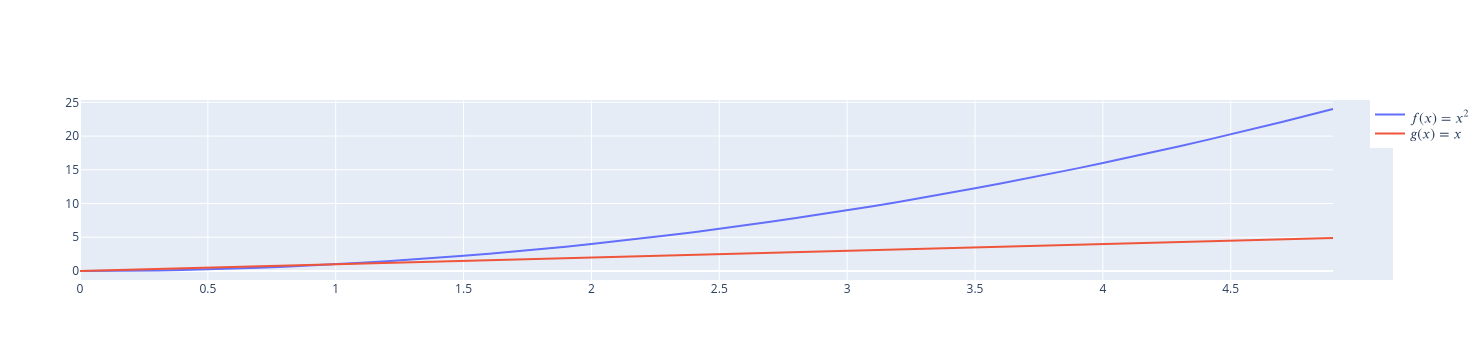

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='$$f(x)=x^2$$'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.show()

К сожалению, это имеет свои ограничения, как можно заметить подсказка при наведении на график отображается в «сыром» виде, а не в LATEX.

Победить это можно, если использовать HTML-разметку в подписях. В ней тег sup обозначает superscript. Так же заметьте, что шрифт для LATEX и HTML отличается начертанием.

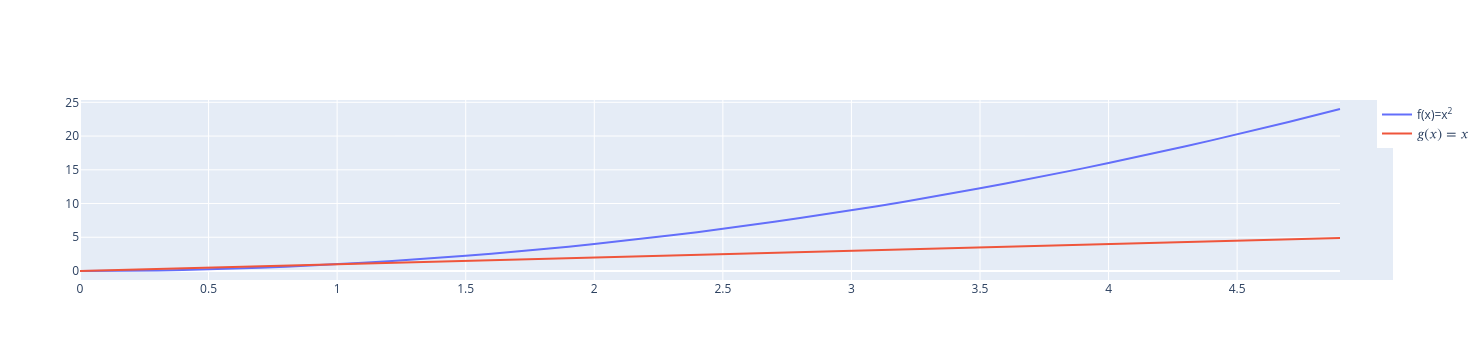

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.show()

С увеличением длины подписи графика легенда может начать наезжать на график. Можно перенести легенду вниз.

Для этого применим к фигуре метод update_layout, у которого нас интересует атрибут `legend_orientation fig.update_layout(legend_orientation="h")`.

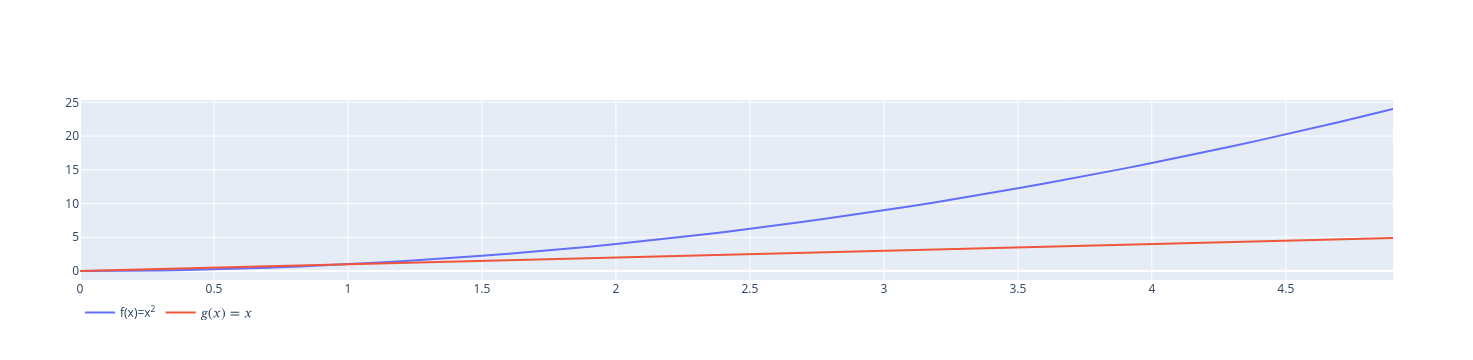

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h")
fig.show()

Хорошо, но слишком большая часть рабочего пространства ноутбука не используется. Особенно это заметно сверху — большой отступ сверху до поля графика.

По умолчанию поля графика имеют отступ 20 пикселей. Мы можем задать свои значения отступам с помощью update_layout, у которого есть атрибут margin, принимающий словарь из отступов:

- l — отступ слева
- r — отступ справа
- t — отступ сверху
- b — отступ снизу

Зададим везде нулевые отступы `fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))`.

update_layout можно применять последовательно несколько раз, либо можно передать все аргументы в одну функцию (мы сделаем именно так).

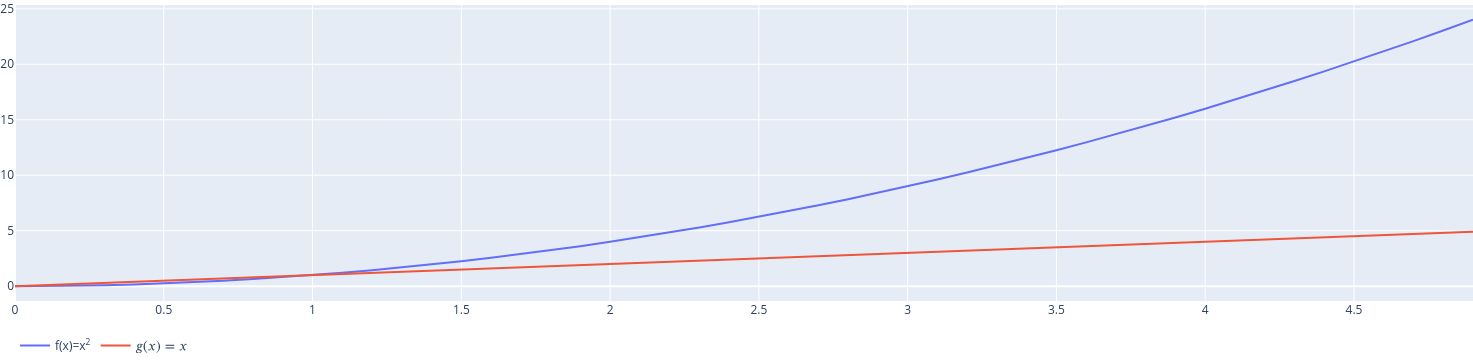

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h", 
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

Поскольку подписи в легенде короткие, было бы здорово выровнять их по центру.

Для этого можно использовать у update_layout атрибут legend, куда передать словарь с координатами для сдвига (сдвиг может быть и по вертикали, но мы используем только горизонталь).

Сдвиг задаётся в долях от ширины всей фигуры, но важно помнить, что сдвигается левый край легенды. Т.е. если мы укажем 0.5 (50% ширины), то надпись будет на самом деле чуть сдвинута вправо.

Т.к. реальная ширина зависит от особенностей вашего экрана, браузера, шрифтов и т.п., то этот параметр часто приходится подгонять. 

Чтобы не шаманить с шириной, можно легенду относительно точки сдвига с помощью аргумента xanchor.

В итоге для легенды мы получим такой словарь:

`legend=dict(x=.5, xanchor="center")`

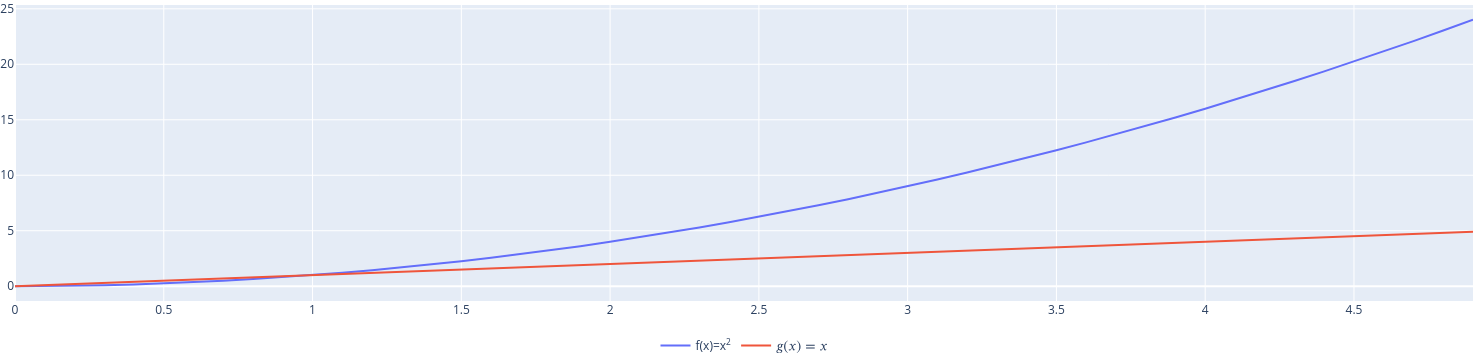

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

Стоит сразу задать подписи к осям и графику в целом. Для этого нам вновь понадобится update_layout, у которого добавится 3 новых аргумента:

    title="Plot Title",
    xaxis_title="x Axis Title",
    yaxis_title="y Axis Title",
    
Следует заметить, что сдвиги, которые мы задали ранее могут негавтивно сказаться на читаемости подписей (так заголовок графика вообще вытесняется из области видимости, поэтому я увеличу отступ сверху с 0 до 30 пикселей.

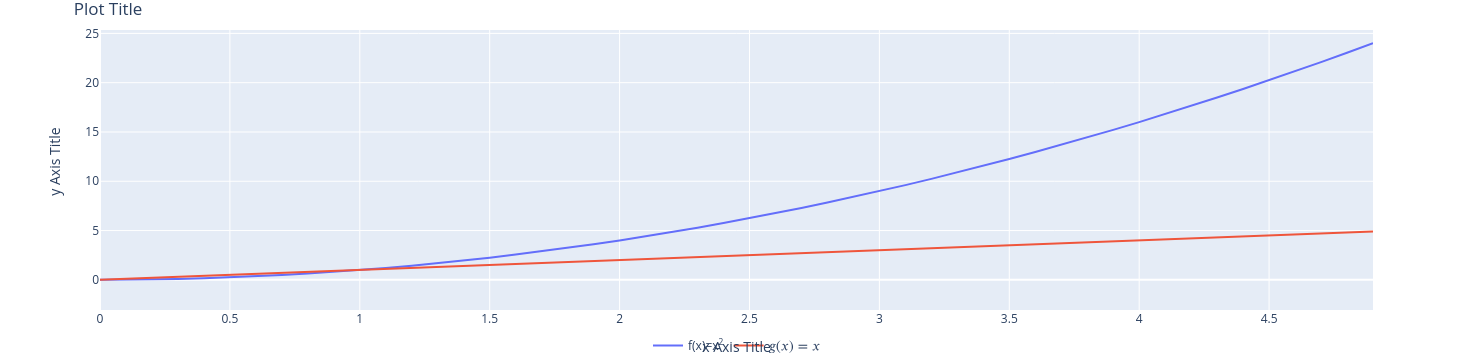

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Plot Title",
                  xaxis_title="x Axis Title",
                  yaxis_title="y Axis Title",
                  margin=dict(l=100, r=100, t=30, b=50))
fig.show()

Если же мы хотим изобразить несколько графиков на одном рисунке, для этого нам потребуется создать фигуру с несколькими осями.

Фигура с несколькими графиками создаётся с помощью подмодуля make_subplots.

Необходимо указать количество:

- row — строк
- col — столбцов

А при построении графика передать «координаты» графика в этой «матрице» (сперва строка, потом столбец).

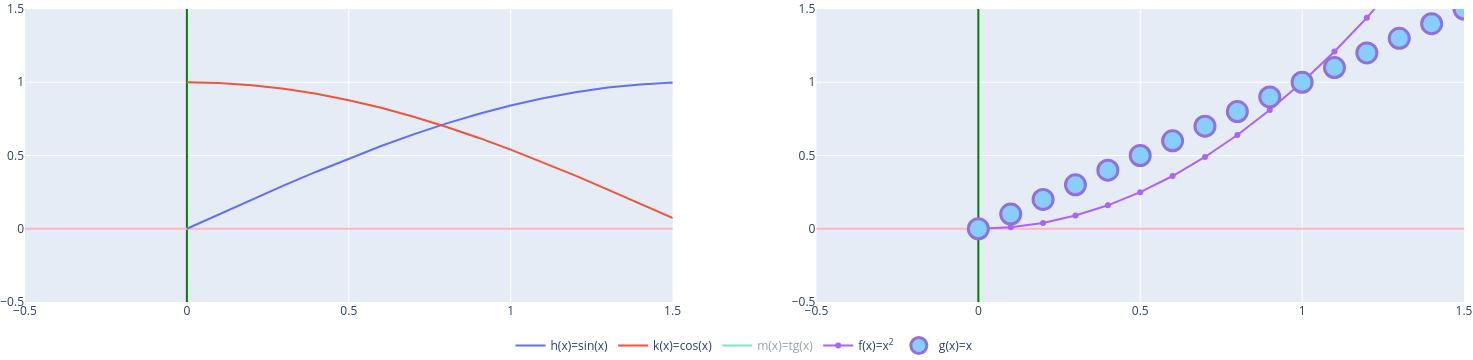

In [32]:
def h(x):
    return np.sin(x)

def k(x):
    return np.cos(x)

def m(x):
    return np.tan(x)

fig = make_subplots(rows=1, cols=2)

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Заголовки графиков можно задать, при создании фигуры, передав в аргумент subplot_titles кортеж/список с названиями.

Подписи осей под графиками можно поменять с помощью методов фигуры:

    fig.update_xaxes
    fig.update_yaxes

Передавая в них номер строки и колонки (т.е. «координаты изменяемого графика»).

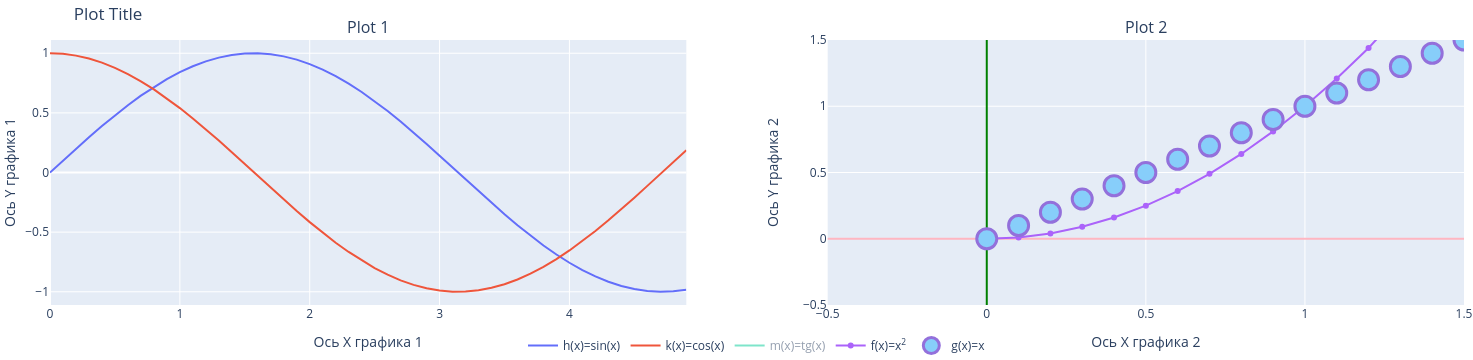

In [33]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Plot 1", "Plot 2"))

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=40, b=0))
fig.update_layout(title="Plot Title")
fig.update_xaxes(title='Ось X графика 1', col=1, row=1)
fig.update_xaxes(title='Ось X графика 2', col=2, row=1)
fig.update_yaxes(title='Ось Y графика 1', col=1, row=1)
fig.update_yaxes(title='Ось Y графика 2', col=2, row=1)
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

И конечно, если необходимо сделать так, чтобы один график был больше, а другой меньше, то для этого используется аргументы

- column_widths — задаёт отношения ширины графиков (в одной строке)
- row_heights — задаёт отношения высот графиков (в одном столбце)

Каждый из этих параметров принимает список чисел, которых должно быть столько, сколько графиков в строке/столбце. Отношения чисел задают отношения ширин или высот.

Рассмотрим на примере ширин. Сделаем левый график вдвое шире правого, т.е. зададим соотношение 2:1.

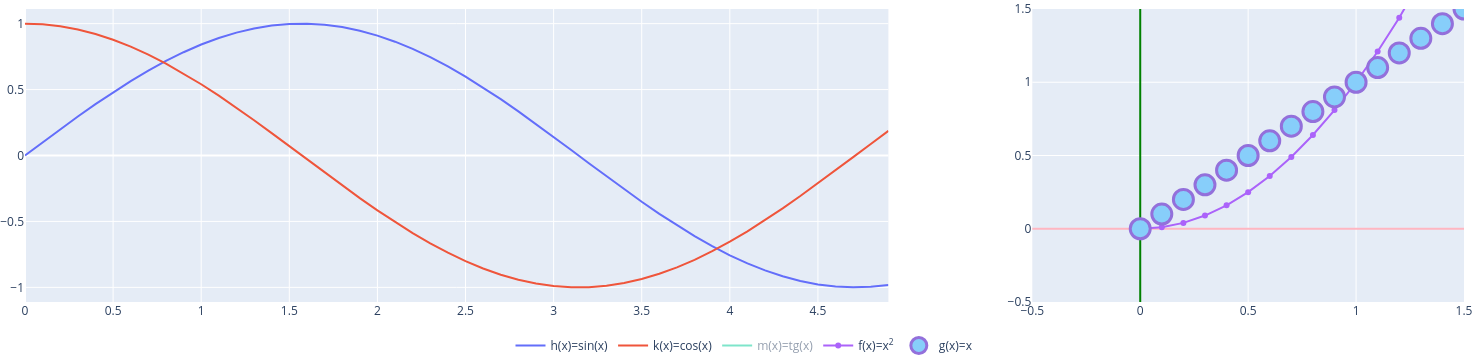

In [34]:
fig = make_subplots(rows=1, cols=2, column_widths=[2, 1])

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

А что если мы хотим выделить одному из графиков больше места, чем другим, например, 2 строки или наоборот, 2 столбца?

В matplotlib мы использовали бы несколько фигур, либо оси с заданными размерами, здесь у нас есть другой инструмент. Мы можем сказать каким-то осям объединиться вдоль колонок или вдоль строк.

Для этого нам потребуется написать спецификацию на фигуру (для начала очень простую).

Спецификация — это список (если точнее, то даже матрица из списков), каждый объект внутри которого — словарь, описывающий одни из осей.

Если каких-то осей нет (например, если их место занимают растянувшиеся соседи, то вместо словаря передаётся None.

Давайте сделаем матрицу 2х2 и объединим вместе левые графики, получив одни высокие вертикальные оси. Для этого первому графику передадим атрибут «rowspan» равный 2, а его нижнего соседа уничтожим (None):

    specs=[

     [{"rowspan": 2}, {}],

     [None, {}]

    ]

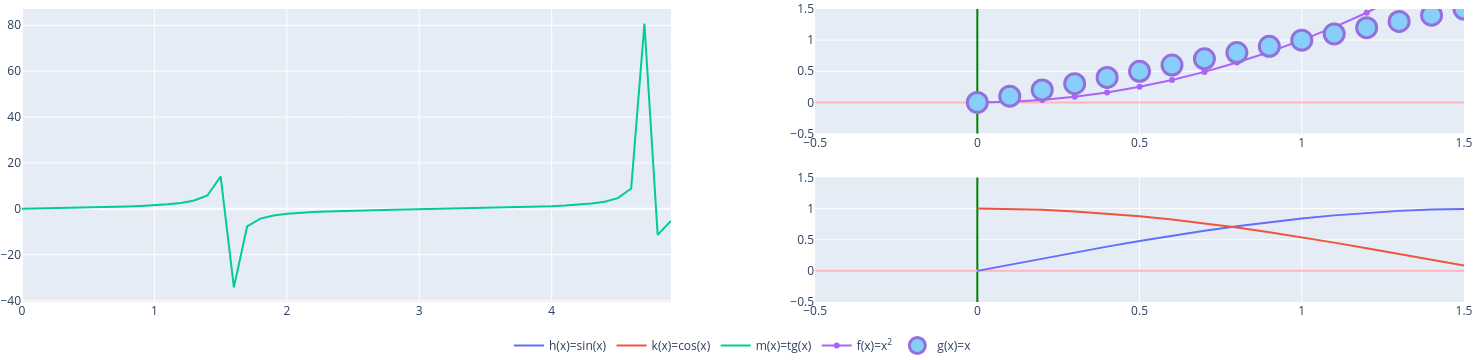

In [35]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"rowspan": 2}, {}], [None, {}]])


fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Как можно было заметить, графики plotly занимают всю доступную ширину, а нам может хотеться задавать ее. Давайте это сделаем:

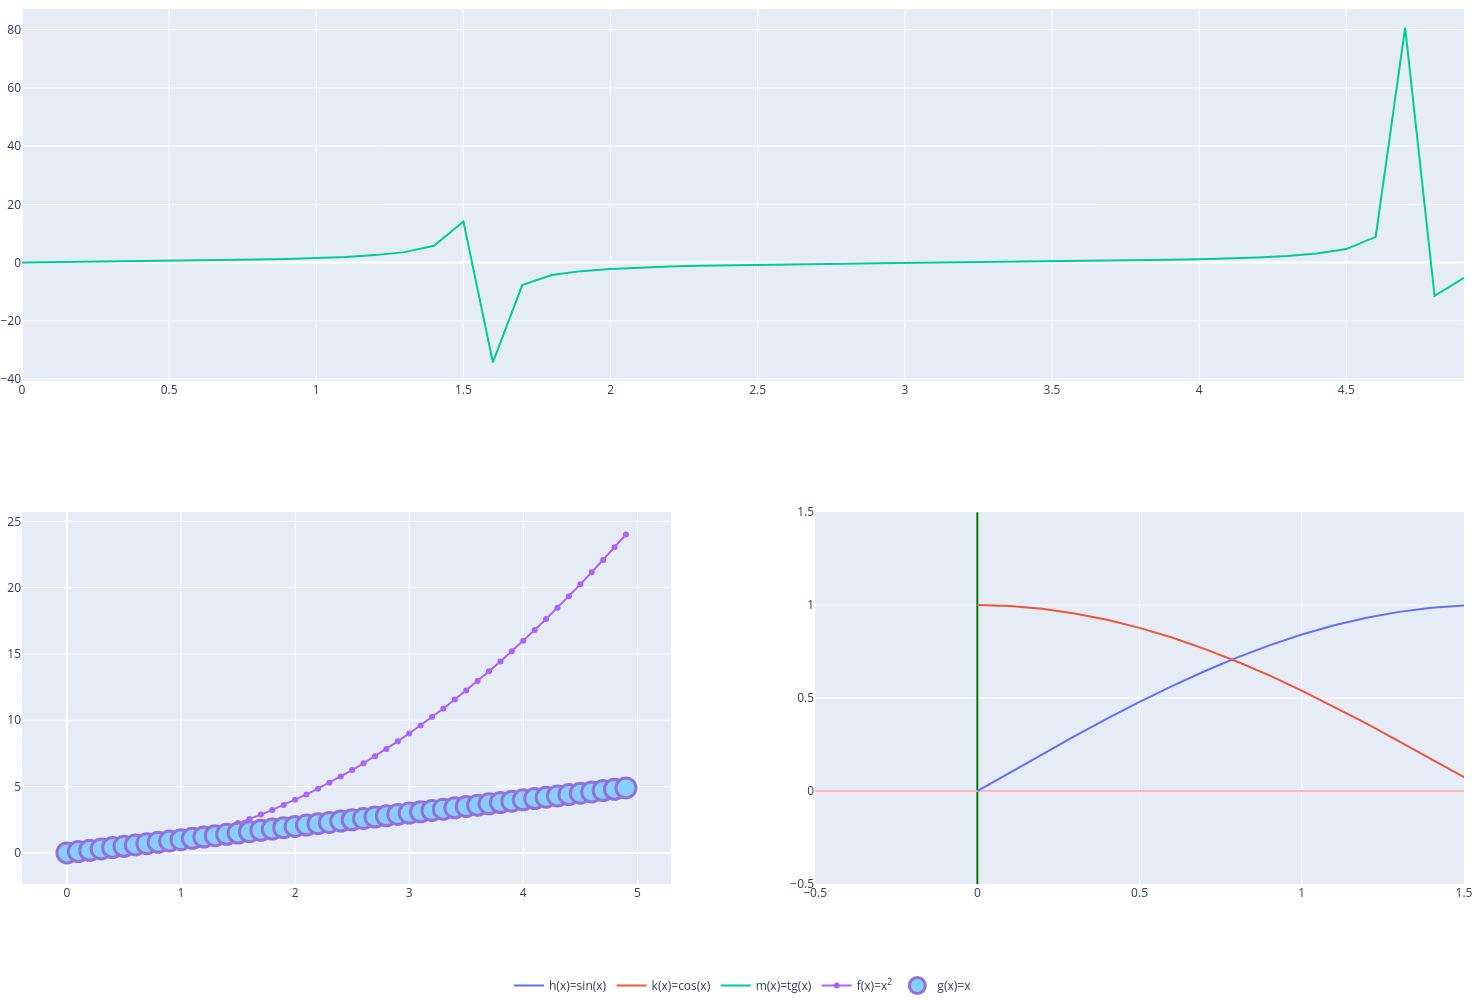

In [36]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"colspan": 2}, None], [{}, {}]])


fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 2, 1)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 2, 1)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0),
                  height=1000,
                  width=600)
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Остальные клевые штуки по plotly вы можете посмотреть и потыкать в оригинальной [статье с хабра](https://habr.com/ru/articles/502958/), часть которой я тут и пересказываю. :)